In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
# Create xi values (1, 2, 3, 4, 5)
xi = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Create random yi values
yi = np.array([1.2, 1.8, 2.6, 3.2, 3.8]) # Random values between 0 and 10

# Create a pandas DataFrame
data = pd.DataFrame({'xi': xi.flatten(), 'yi': yi.flatten()})

In [15]:
data

,xi,yi
0,1,1.2
1,2,1.8
2,3,2.6
3,4,3.2
4,5,3.8


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['xi']], data['yi'], test_size=0.2, random_state=42
)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00734693877551019
R-squared: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [20]:
new_x = np.array([[6]])  # Reshape to a column vector
predicted_y = model.predict(new_x)
print(f"Predicted y for x = 6: {predicted_y[0]}")

Predicted y for x = 6: 4.491428571428571


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# Display intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

Intercept: 0.5828571428571427
Coefficient (slope): 0.6514285714285715


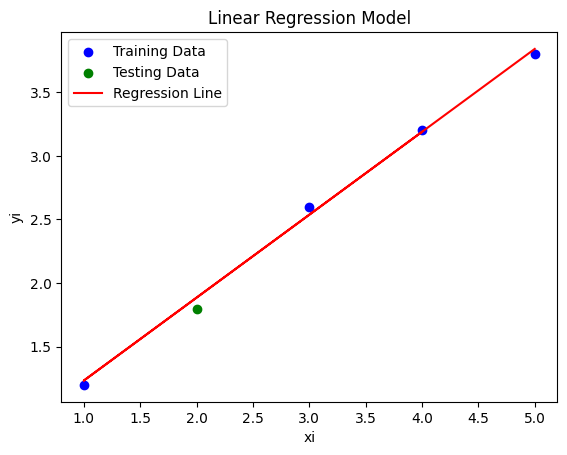

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of the original data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Linear Regression Model')

# Display the legend
plt.legend()

# Show the plot
plt.show()

Intercept (theta0): 0.5400000000000025
Slope (theta1): 0.6600000000000001
Enter a value for X to predict y: 4
Predicted y for X = 4.0: 3.1800000000000033


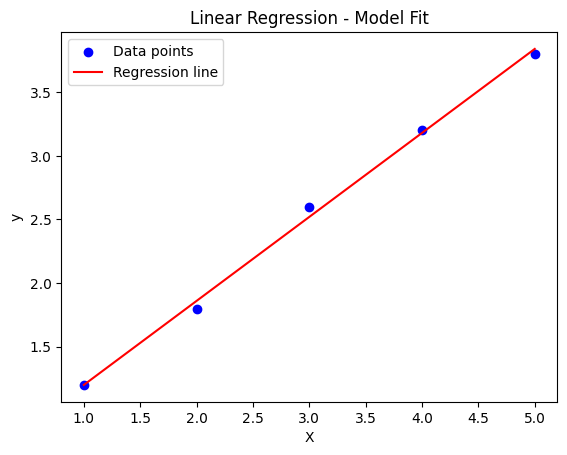

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (X and y)
X = np.array([1, 2, 3, 4, 5])  # Input features
y = np.array([1.2, 1.8, 2.6, 3.2, 3.8])  # Target variable

# Add a column of ones to X for the bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculate the coefficients (intercept and slope) using the Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Intercept and Slope
intercept, slope = theta

# Print intercept and slope
print(f"Intercept (theta0): {intercept}")
print(f"Slope (theta1): {slope}")

# Make predictions for a new input value of X
x_input = float(input("Enter a value for X to predict y: "))
x_input_b = np.array([1, x_input])  # Add 1 for the bias term
y_pred = x_input_b.dot(theta)  # Calculate the predicted y

# Display the predicted value
print(f"Predicted y for X = {x_input}: {y_pred}")

# Visualize the data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression - Model Fit')
plt.legend()
plt.show()